<a href="https://colab.research.google.com/github/sharmaparnika/Uber-Fare-Prediction/blob/main/Uber_Fare_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**UBER FARE PREDICTION**

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from random import randrange, uniform

In [16]:
Train_Data = pd.read_csv(r'/content/trainn.csv')
Train_Data.head(1)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1


In [17]:
Train_Data.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [18]:
Train_Data.drop(labels='key',axis=1,inplace=True)

In [19]:
Train_Data.shape

(200000, 7)

In [20]:
test = pd.read_csv(r'/content/testt.csv')
test.head(1)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,37338,31401407,2011-02-10 19:06:00.000000169,2011-02-10 19:06:00 UTC,-73.951662,40.79071,-73.94757,40.75622,1


In [21]:
test.shape,Train_Data.shape

((50000, 10), (200000, 7))

In [22]:
Train_Data.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [23]:
test.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,0,37338,31401407,2011-02-10 19:06:00.000000169,2011-02-10 19:06:00 UTC,-73.951662,40.790710,-73.947570,40.756220,1
1,1,160901,33158465,2011-06-23 09:24:00.000000157,2011-06-23 09:24:00 UTC,-73.951007,40.771508,-73.974075,40.763553,1
2,2,40428,10638355,2012-07-14 10:37:00.000000149,2012-07-14 10:37:00 UTC,-73.996473,40.747930,-73.990298,40.756152,6
3,3,63353,3836845,2014-10-19 22:27:05.0000002,2014-10-19 22:27:05 UTC,-73.997934,40.716890,-73.952617,40.727149,1
4,4,165491,27114503,2015-05-25 22:54:43.0000001,2015-05-25 22:54:43 UTC,-73.952583,40.714039,-73.906128,40.711281,1


#As this is Taxi fare data and we know there are many factors which affect the price of taxi like 
1. Travelled distance
2. Time of Travel
3. Demand and Availability of Taxi
4. Some special places are more costlier like Airport or other places where there might be toll

In [24]:
print(Train_Data.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         50000 non-null  int64  
 1   Unnamed: 0.1       50000 non-null  int64  
 2   Unnamed: 0.1.1     50000 non-null  int64  
 3   key                50000 no

*Here we can see there are 8columns in which 6 numerics and 2 are object.*

Lets change the type of pickup_datetime from object to DateTime

In [25]:
Train_Data["pickup_datetime"] = pd.to_datetime(Train_Data["pickup_datetime"])

In [26]:
print(Train_Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        200000 non-null  float64            
 1   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 2   pickup_longitude   200000 non-null  float64            
 3   pickup_latitude    200000 non-null  float64            
 4   dropoff_longitude  199999 non-null  float64            
 5   dropoff_latitude   199999 non-null  float64            
 6   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 10.7 MB
None


In [27]:
Train_Data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


1.Here first thing which we can see is minimum value of fare is negative which is -52 which is not the valid value, so we need to remove the fare which are negative values.

2.Secondly, passenger_count minimum value is 0 and maximum value is 208 which impossible, so we need to remove them as well, for safer side we can think that a taxi can have maximum 7 people.

In [28]:
Train_Data.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [29]:
Train_Data.dropna(axis = 0, inplace= True)

In [30]:
print(Train_Data.isnull().sum())

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


#Lets see the statistics of our data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


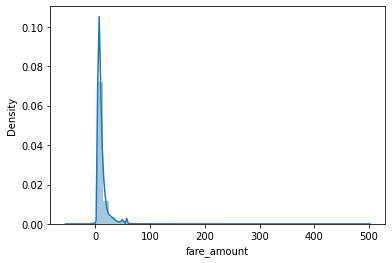

In [31]:
sns.distplot(Train_Data['fare_amount'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


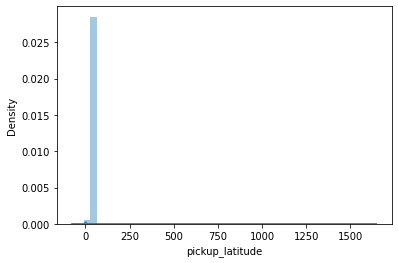

In [32]:
sns.distplot(Train_Data['pickup_latitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


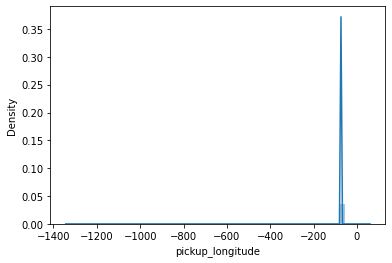

In [33]:
sns.distplot(Train_Data['pickup_longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


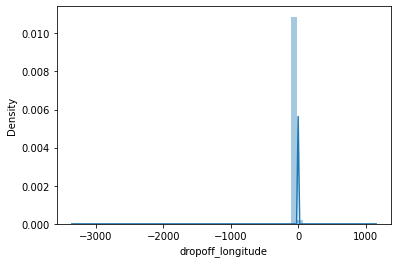

In [34]:
sns.distplot(Train_Data['dropoff_longitude'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


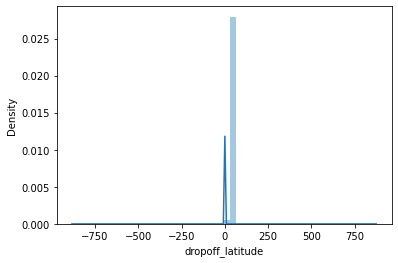

In [35]:
sns.distplot(Train_Data['dropoff_latitude'])

In [36]:
print("drop_off latitude min value",Train_Data["dropoff_latitude"].min())
print("drop_off latitude max value",Train_Data["dropoff_latitude"].max())
print("drop_off longitude min value", Train_Data["dropoff_longitude"].min())
print("drop_off longitude max value",Train_Data["dropoff_longitude"].max())
print("pickup latitude min value",Train_Data["pickup_latitude"].min())
print("pickup latitude max value",Train_Data["pickup_latitude"].max())
print("pickup longitude min value",Train_Data["pickup_longitude"].min())
print("pickup longitude max value",Train_Data["pickup_longitude"].max())

drop_off latitude min value -881.9855130000002
drop_off latitude max value 872.6976279999999
drop_off longitude min value -3356.6663
drop_off longitude max value 1153.5726029999996
pickup latitude min value -74.01551500000002
pickup latitude max value 1644.421482
pickup longitude min value -1340.64841
pickup longitude max value 57.418457


In [37]:
print("drop_off latitude min value",test["dropoff_latitude"].min())
print("drop_off latitude max value",test["dropoff_latitude"].max())
print("drop_off longitude min value", test["dropoff_longitude"].min())
print("drop_off longitude max value",test["dropoff_longitude"].max())
print("pickup latitude min value",test["pickup_latitude"].min())
print("pickup latitude max value",test["pickup_latitude"].max())
print("pickup longitude min value",test["pickup_longitude"].min())
print("pickup longitude max value",test["pickup_longitude"].max())

drop_off latitude min value -74.00110699999998
drop_off latitude max value 47.433332
drop_off longitude min value -1491.194073
drop_off longitude max value 40.796262
pickup latitude min value -74.001047
pickup latitude max value 42.46842
pickup longitude min value -80.734728
pickup longitude max value 40.812005


In [38]:
min_longitude=-1491.194073,
min_latitude=-74.001047,
max_longitude=40.812005, 
max_latitude=41.709555

In [39]:
min_longitude=-1491.194073,
min_latitude=-74.001047,
max_longitude=40.812005, 
max_latitude=41.709555

In [40]:
tempdf=Train_Data[(Train_Data["dropoff_latitude"]<min_latitude) | 
                (Train_Data["pickup_latitude"]<min_latitude) |
                (Train_Data["dropoff_longitude"]<min_longitude) | 
                (Train_Data["pickup_longitude"]<min_longitude) |
                (Train_Data["dropoff_latitude"]>max_latitude) | 
                (Train_Data["pickup_latitude"]>max_latitude) | 
                (Train_Data["dropoff_longitude"]>max_longitude) | 
                (Train_Data["pickup_longitude"]>max_longitude) ]
print("before droping",Train_Data.shape)
Train_Data.drop(tempdf.index,inplace=True)
print("after droping",Train_Data.shape)

before droping (199999, 7)
after droping (199961, 7)


In [41]:
import calendar
Train_Data['day']=Train_Data['pickup_datetime'].apply(lambda x:x.day)
Train_Data['hour']=Train_Data['pickup_datetime'].apply(lambda x:x.hour)
Train_Data['month']=Train_Data['pickup_datetime'].apply(lambda x:x.month)
Train_Data['year']=Train_Data['pickup_datetime'].apply(lambda x:x.year)
Train_Data['weekday']=Train_Data['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [42]:
Train_Data.weekday = Train_Data.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [43]:
Train_Data.drop(labels = 'pickup_datetime',axis=1,inplace=True)

In [44]:
Train_Data.head(1)
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199961 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199961 non-null  float64
 1   pickup_longitude   199961 non-null  float64
 2   pickup_latitude    199961 non-null  float64
 3   dropoff_longitude  199961 non-null  float64
 4   dropoff_latitude   199961 non-null  float64
 5   passenger_count    199961 non-null  int64  
 6   day                199961 non-null  int64  
 7   hour               199961 non-null  int64  
 8   month              199961 non-null  int64  
 9   year               199961 non-null  int64  
 10  weekday            199961 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 18.3 MB


# Model Building

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x=Train_Data.drop("fare_amount", axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,-73.999817,40.738354,-73.999512,40.723217,1,7,19,5,2015,4
1,-73.994355,40.728225,-73.994710,40.750325,1,17,20,7,2009,5
2,-74.005043,40.740770,-73.962565,40.772647,1,24,21,8,2009,1
3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,6,2009,5
4,-73.925023,40.744085,-73.973082,40.761247,5,28,17,8,2014,4
...,...,...,...,...,...,...,...,...,...,...
199995,-73.987042,40.739367,-73.986525,40.740297,1,28,10,10,2012,0
199996,-73.984722,40.736837,-74.006672,40.739620,1,14,1,3,2014,5
199997,-73.986017,40.756487,-73.858957,40.692588,2,29,0,6,2009,1
199998,-73.997124,40.725452,-73.983215,40.695415,1,20,14,5,2015,3


In [47]:
y=Train_Data["fare_amount"]

In [48]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [49]:
x_train.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
36449,-73.963597,40.761797,-73.970199,40.762533,1,4,22,9,2014,4
177679,-74.013143,40.705700,-73.867012,40.768862,4,2,17,1,2013,3
36877,-73.993683,40.702455,-73.917713,40.684747,2,31,3,10,2010,0
20428,-73.954686,40.780613,-73.971005,40.758253,1,29,10,8,2012,3
18927,-73.978887,40.777162,-73.993860,40.746392,1,14,16,7,2013,0


In [50]:
x_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
35707,-73.979422,40.743943,-73.969162,40.758608,1,26,16,6,2012,2
37333,-74.000873,40.747298,-73.991410,40.764548,2,14,17,4,2011,4
131999,-74.007640,40.732222,-73.988398,40.748832,5,29,8,11,2010,1
106818,-73.960133,40.719825,-73.942702,40.717567,4,6,21,9,2013,5
52881,-73.995711,40.764551,-73.991177,40.750312,2,1,8,5,2009,5


In [51]:
y_train.head()

36449      4.5
177679    47.3
36877     20.9
20428      8.9
18927     11.0
Name: fare_amount, dtype: float64

In [52]:
y_test.head()

35707     7.3
37333     6.5
131999    8.1
106818    8.5
52881     9.7
Name: fare_amount, dtype: float64

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(159968, 10)
(39993, 10)
(39993,)
(159968,)


# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [56]:
predictedvalues = lrmodel.predict(x_test)

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
lrmodelrmse = np.sqrt(mean_squared_error(predictedvalues, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 10.05963609768883


# Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [60]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [61]:
rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  4.838074481378921


In [62]:
rfrmodel_pred.shape

(39993,)

# Working on Test Data

In [63]:
test = pd.read_csv(r'/content/testt.csv')

In [64]:
test.drop(test[['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key']],axis=1,inplace=True)

In [65]:
test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [66]:
test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

In [67]:
test['day']=test['pickup_datetime'].apply(lambda x:x.day)
test['hour']=test['pickup_datetime'].apply(lambda x:x.hour)
test['month']=test['pickup_datetime'].apply(lambda x:x.month)
test['year']=test['pickup_datetime'].apply(lambda x:x.year)
test['weekday']=test['pickup_datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [68]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,month,year,weekday
0,2011-02-10 19:06:00+00:00,-73.951662,40.790710,-73.947570,40.756220,1,10,19,2,2011,Thursday
1,2011-06-23 09:24:00+00:00,-73.951007,40.771508,-73.974075,40.763553,1,23,9,6,2011,Thursday
2,2012-07-14 10:37:00+00:00,-73.996473,40.747930,-73.990298,40.756152,6,14,10,7,2012,Saturday
3,2014-10-19 22:27:05+00:00,-73.997934,40.716890,-73.952617,40.727149,1,19,22,10,2014,Sunday
4,2015-05-25 22:54:43+00:00,-73.952583,40.714039,-73.906128,40.711281,1,25,22,5,2015,Monday


In [69]:
test.drop(['pickup_datetime'], axis = 1, inplace = True)

In [70]:
test.weekday = test.weekday.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [71]:
rfrmodel_pred= rfrmodel.predict(test)

In [72]:
df = pd.DataFrame(rfrmodel_pred)
df

,0
0,11.2380
1,9.1880
2,5.9320
3,11.8570
4,11.9080
...,...
49995,6.7250
49996,27.4532
49997,7.4750
49998,7.7190



---

